In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

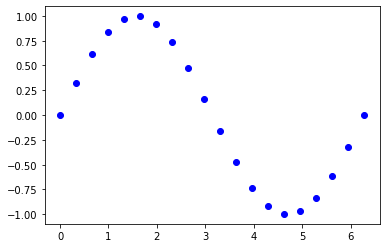

In [2]:
x_train=np.linspace(0,np.pi*2,20)
yd_train=np.array(np.sin(x_train))
plt.plot(x_train,yd_train,'bo')
plt.show()

In [3]:
modelo=keras.models.Sequential()
modelo.add(keras.layers.Dense(10,input_shape=(1,),activation='tanh'))
#modelo.add(keras.layers.Dense(10,activation='tanh'))
modelo.add(keras.layers.Dense(1,activation='linear'))
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


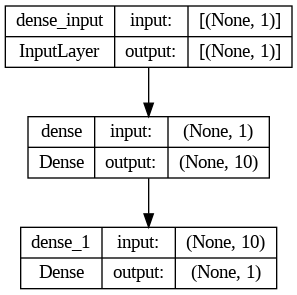

In [4]:
keras.utils.plot_model(modelo, "RNA_Seno.png", show_shapes=True)

In [5]:
#modelo.compile('adam','mse',metrics=['mse'])
#modelo.compile(keras.optimizers.SGD(learning_rate=0.01, momentum=0.01, nesterov=True),'mse',metrics=['mse'])
modelo.compile(keras.optimizers.Adam(),'mse',metrics=['mse'])


In [6]:
historia=modelo.fit(x_train,yd_train,epochs=5000,verbose=0)

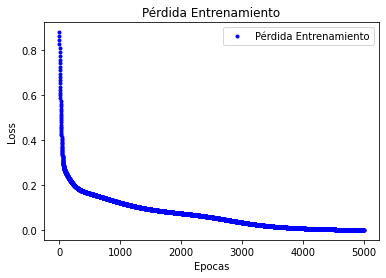

In [7]:
perdida_train = historia.history['loss']
epocas = range(1, len(perdida_train) + 1)

plt.plot(epocas, perdida_train, 'b.', label='Pérdida Entrenamiento')
plt.title('Pérdida Entrenamiento')
plt.xlabel('Epocas')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
modelo.evaluate(x_train,yd_train)

1/1 [==============================] - 0s 152ms/step - loss: 0.0022 - mse: 0.0022


[0.002160454634577036, 0.002160454634577036]

1/1 [==============================] - 0s 86ms/step


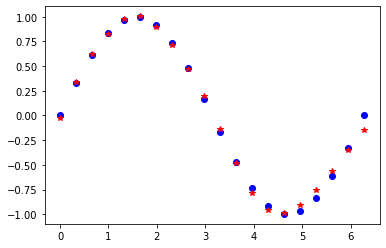

In [9]:
yd_pred=modelo.predict(x_train)
plt.plot(x_train,yd_train,'bo',x_train,yd_pred,'r*')
plt.show()

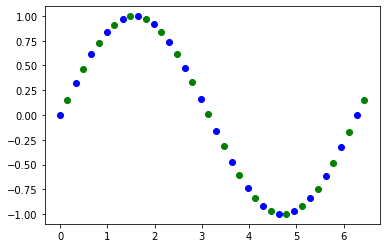

In [10]:
xval=np.linspace(np.pi*0.05,np.pi*2+np.pi*0.05,20)
yval=np.array(np.sin(xval))
plt.plot(x_train,yd_train,'bo',xval,yval,'go')
plt.show()

1/1 [==============================] - 0s 36ms/step


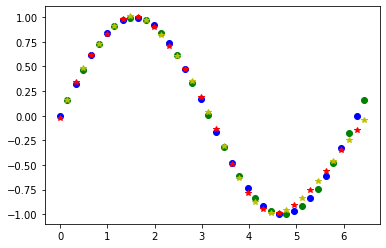

In [11]:
predval=modelo.predict(xval)
plt.plot(x_train,yd_train,'bo',x_train,yd_pred,'r*',xval,yval,'go',xval,predval,'y*')
plt.show()

In [12]:
Wco = modelo.layers[0].get_weights()[0]
print(Wco.shape)
print(Wco)
bco = modelo.layers[0].get_weights()[1]
print(bco.shape)
print(bco)


(1, 10)
[[-1.3335083   1.4715439   0.5302342  -0.27743402 -0.692317   -0.5303021
  -0.6097602  -0.5744226  -0.96369785  0.54470444]]
(10,)
[ 0.02532512 -1.6848781  -0.54048324  1.2300357   1.5638852   0.52139705
  1.0222875   0.76389647  3.4848762  -0.5862908 ]


In [13]:
Wcs = modelo.layers[1].get_weights()[0]
print(Wcs.shape)
print(Wcs)
bcs = modelo.layers[1].get_weights()[1]
print(bcs.shape)
print(bcs)

(10, 1)
[[-1.1293687 ]
 [ 0.6996829 ]
 [-0.14312117]
 [-3.1027584 ]
 [ 0.24339192]
 [ 0.50968593]
 [ 0.63381445]
 [ 0.24350363]
 [ 1.5339477 ]
 [-0.47219694]]
(1,)
[0.3078219]
